# Snf2h paper analysis and figures

21/09/16

Code for generating supplemental figures and statistics for the Snf2h SAMOSA 2 paper

## Average accessibility in E14
21/09/16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os
import socket
from Bio import Seq, SeqIO


if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    figPBase = '/avicenna/cmcnally/pbanalysis/'
if 'titan' in socket.gethostname():
    dataPBase = '/data/users/goodarzilab/colin/results/pacbio/'
if 'wynton' in socket.gethostname():
    dataPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
if 'rumi' in socket.gethostname():
    raise Exception('no pacbio results folder on rumi')
    
    
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',')

,Unnamed: 0,cell,sampleName,unalignedSubreadsFile,ccsFile,alignedSubreadsFile,alignedCcsFile,reference,processed,index
0,0,pbrun9_SAMv2,k562_SAMv2_minusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
1,1,pbrun9_SAMv2,k562_SAMv2_minusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
2,2,pbrun9_SAMv2,k562_SAMv2_plusM_rep1,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
3,3,pbrun9_SAMv2,k562_SAMv2_plusM_rep2,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,/avicenna/genomes/hg38/hg38.mmi,/avicenna/vramani/analyses/pacbio/pbrun9_SAMv2...,NaN
4,4,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
5,5,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
6,6,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
7,7,pbrun11_mESCs_SNF2h,SNF2hKO_mESCs_minusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
8,8,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep1,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN
9,9,pbrun11_mESCs_SNF2h,SNF2hWTAB_mESCs_plusM_rep2,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN,/wynton/group/goodarzilab/ramanilab/results/pa...,/wynton/group/goodarzilab/ramanilab/genomes/mm...,/wynton/group/goodarzilab/ramanilab/results/pa...,NaN


In [29]:
negSamples = [12,13]
chrSamples = [14,15]
posSamples = [28]

In [24]:
accessFdic = {}

for samp in tqdm([12, 13, 14, 15, 28], position=0):

    with open('{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp]), 'rb') as fin:
        hmmRes = pickle.load(fin)
        
    zmws = list(hmmRes.keys())

    accessCount = np.full(1000, 0, dtype='float')
    contribCount = np.full(1000, 0, dtype='int')
    
    for z in zmws[0:24000]:
        useM = np.nonzero(np.isfinite(hmmRes[z]))[0]
        useM = useM[useM < 1000]
        accessCount[useM] += hmmRes[z][useM]
        contribCount[useM] += 1
        
    accessFdic[samp] = accessCount / contribCount

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:17<00:00,  3.47s/it]


In [22]:
for samp in [12,13,14,15,28]:
    print(sampleRef['sampleName'][samp])

E14_mESCs_minusM_rep1
E14_mESCs_minusM_rep2
E14_mESCs_plusM_rep1
E14_mESCs_plusM_rep2
E14mESC_gDNAplusM


In [26]:
combdic = {'sample':[], 'rep':[], 'position':[], 'fraction':[]}
sampShortN = {12:'E14_chromatin', 13:'E14_chromatin', 14:'E14_chromatin_methylated',
              15:'E14_chromatin_methylated', 28:'E14_gDNA_methylated'}
sampRep = {12:'rep1', 13:'rep2', 14:'rep1', 15:'rep2', 28:'rep1'}

for samp in [12,13,14,15,28]:
    for b in range(1000):
        if np.isfinite(accessFdic[samp][b]):
            combdic['sample'].append(sampShortN[samp])
            combdic['rep'].append(sampRep[samp])
            combdic['position'].append(b)
            combdic['fraction'].append(accessFdic[samp][b])
            
combdf = pd.DataFrame(combdic)

combdf.to_csv('{0}{1}/processed/e14AccessFig.csv'.format(dataPBase, sampleRef['cell'][12]), index=False)

In [ ]:
plt.figure()
for samp in [12, 13, 14, 15, 28]:
    plt.plot(accessFdic[samp], label=sampleRef['sampleName'][samp])
plt.legend(loc='upper right')

In [8]:
accessFdic[12][0:20]

array([       nan,        nan,        nan, 0.00478215, 0.0042172 ,
       0.00380795, 0.00399811, 0.00383979, 0.00357284, 0.00380048,
       0.00342088, 0.00306827, 0.00269531, 0.0024988 , 0.00231786,
       0.00212539, 0.0018501 , 0.00166556, 0.00156369, 0.00147341])

In [18]:
samp = 13

with open('{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                          sampleRef['cell'][samp],
                                                                          sampleRef['sampleName'][samp]), 'rb') as fin:
    hmmRes = pickle.load(fin)
        
zmws = list(hmmRes.keys())
usezmws = zmws[0:24000]


inac = pd.read_csv(dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                  sampleRef['sampleName'][samp]), index_col=0)

In [ ]:
sorted(zmws)

In [14]:
hmm = hmmRes[9]

In [15]:
inacregion = hmm
inacregion[np.isfinite(inacregion)] = inacregion[np.isfinite(inacregion)] > 0.5

inacswitch = np.diff(inacregion)
switchp = np.where(np.logical_or(inacswitch == 1, inacswitch == -1))[0]

In [17]:
len(switchp)

0

In [19]:
inac

,zmw,length,start,end
0,9,3869,NaN,NaN
1,47,1086,NaN,NaN
2,74,3672,NaN,NaN
3,151,2047,NaN,NaN
4,183,1232,NaN,NaN
...,...,...,...,...
139197,180554488,2669,NaN,NaN
139198,180554504,3167,NaN,NaN
139199,180554526,1116,NaN,NaN
139200,180554544,792,NaN,NaN


Text(0.5, 0, 'size')

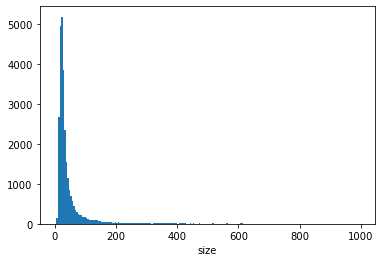

In [23]:
plt.hist(inac['length'], np.arange(0,1000,5))
plt.xlabel('size')

In [20]:
inacWd = {}
for samp in tqdm([12, 13, 14, 15, 28], position=0):

    with open('{0}{1}/processed/binarized/{1}_{2}_NNsingle_HMM.pickle'.format(dataPBase,
                                                                              sampleRef['cell'][samp],
                                                                              sampleRef['sampleName'][samp]), 'rb') as fin:
        hmmRes = pickle.load(fin)
        
    zmws = list(hmmRes.keys())
    usezmws = zmws[0:24000]
    
    inac = pd.read_csv(dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                      sampleRef['sampleName'][samp]), index_col=0)
    inacWd[samp] = inac[np.isin(inac['zmw'], usezmws)]['length'].to_numpy()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:15<00:00,  3.08s/it]


In [ ]:
inac[np.isin(inac['zmw'], usezmws)]

In [28]:
inacWd[12]

array([ 805, 2574, 1132, ..., 2257, 2597, 1631])

In [29]:
combdic = {'sample':[], 'rep':[], 'length':[]}
sampShortN = {12:'E14_chromatin', 13:'E14_chromatin', 14:'E14_chromatin_methylated',
              15:'E14_chromatin_methylated', 28:'E14_gDNA_methylated'}
sampRep = {12:'rep1', 13:'rep2', 14:'rep1', 15:'rep2', 28:'rep1'}

for samp in [12,13,14,15,28]:
    for i in inacWd[samp]:
        combdic['sample'].append(sampShortN[samp])
        combdic['rep'].append(sampRep[samp])
        combdic['length'].append(i)
            
combdf = pd.DataFrame(combdic)

combdf.to_csv('{0}{1}/processed/e14FootprintsFig.csv'.format(dataPBase, sampleRef['cell'][12]), index=False)

In [ ]:
fig, ax = plt.subplots(5,1, figsize=(6,10), sharex=True, sharey=False)

for ix, samp in enumerate([12, 13, 14, 15, 28]):
    ax[ix].hist(inacWd[samp], np.arange(0,1000,10))


## Cutoffs for nucleosome counting
21/10/12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from tqdm import tqdm
import pickle
import os
import socket
from Bio import Seq, SeqIO


if 'biochem1' in socket.gethostname():
    dataPBase = '/avicenna/vramani/analyses/pacbio/'
    figPBase = '/avicenna/cmcnally/pbanalysis/'
if 'assembler4' in socket.gethostname():
    dataPBase = '/data/users/goodarzilab/colin/results/pacbio/'
if 'wynton' in socket.gethostname():
    dataPBase = '/wynton/group/goodarzilab/ramanilab/results/pacbio/'
if 'rumi' in socket.gethostname():
    raise Exception('no pacbio results folder on rumi')
    
    
# CTCF sites
# load in reference sequences for both the independent and dependent CTCF sites
refFile = dataPBase + 'pbrun10_CTCFpool_2/snf2h_independent_site_observed.fasta'
for ir, record in enumerate(SeqIO.parse(refFile, 'fasta')):
    if ir > 0:
        raise InputError('Reference fasta has multiple entries')
    irefseq = record.seq # reference sequence for independent CTCF site
refFile = dataPBase + 'pbrun10_CTCFpool_2/snf2h_dependent_site_observed.fasta'
for ir, record in enumerate(SeqIO.parse(refFile, 'fasta')):
    if ir > 0:
        raise InputError('Reference fasta has multiple entries')
    drefseq = record.seq # reference sequence for dependent CTCF site

# Load in the sample reference tables for the CTCF site samples
sampleRef = pd.read_csv(dataPBase + 'pbrun10_CTCFpool_2/pbrun10_CTCFpool_2.sampleReference.csv')
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + 'pbrun10_CTCFpool_1/pbrun10_CTCFpool_1.sampleReference.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210516_NA_SNF2hCTCFarray_ST_rep2/210516_NA_SNF2hCTCFarray_ST_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210520_NA_SNF2hCTCFarray_MT_rep1/210520_NA_SNF2hCTCFarray_MT_rep1.sampleReference.wynton.csv')],
                      ignore_index=True)
sampleRef = pd.concat([sampleRef,
                       pd.read_csv(dataPBase + '210608_NA_SNF2hCTCFarray_MT_rep2/210608_NA_SNF2hCTCFarray_MT_rep2.sampleReference.wynton.csv')],
                      ignore_index=True)

del sampleRef['index']

indepSamples = np.nonzero([(name[0:5] == 'Indep' or name[0:8] == 'CTCF_Ind') for name in sampleRef['sampleName']])[0]
depSamples = np.nonzero([(name[0:5] == 'Depen' or name[0:8] == 'CTCF_Dep') for name in sampleRef['sampleName']])[0]

regionAll = pd.DataFrame()
for samp in tqdm(indepSamples[2:], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllInd = regionAll

regionAll = pd.DataFrame()
for samp in tqdm(depSamples[2:], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllDep = regionAll

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:15<00:00,  2.93it/s]


In [2]:
sampleRef = pd.read_csv(dataPBase + 'sampleRef_K562_mESC.csv', sep=',')

regionAll = pd.DataFrame()
for samp in tqdm([4,5,8,9,14,15,20,21,22,23,24,25,26,27,32,33,34,35,36,37,38,40,41,42,44,45,46,48], position=0):
    regionFile = dataPBase + '{0}/processed/inaccessibleRegions/{0}_{1}_inacRegions.csv'.format(sampleRef['cell'][samp],
                                                                                                sampleRef['sampleName'][samp])
    regiondf = pd.read_csv(regionFile, index_col=0)

    regiondf['mid'] = regiondf['start'] + (regiondf['end'] - regiondf['start']) / 2
    regiondf['sample'] = samp
    
    regionAll = pd.concat([regionAll, regiondf])
    
regionAllmESC = regionAll

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [06:35<00:00, 14.12s/it]


In [ ]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

regiondf = {'mesc':regionAllmESC['length'],
            'ind':regionAllInd['length'],
            'dep':regionAllDep['length']}
            
divs = {'mesc': [50, 200, 370, 500, 630, 800, 970, 1090, 1200],
        'ind': [70, 205, 340, 475, 610, 780, 950, 1120, 1300, 1500, 1650, 1770, 1980, 2170, 2350, 2520, 2660],
        'dep': [70, 205, 345, 470, 605, 740, 880, 1005, 1175, 1320, 1500, 1740, 1890, 2035, 2180, 2310, 2480, 2740, 2870, 3000]}
            
refL = {'mesc': 3080,
        'ind': 2706,
        'dep': 3087}

names = {'mesc': 'mESC',
         'ind': 'S1',
         'dep': 'S2'}
    
fig, ax = plt.subplots(3,1, figsize=(7,7), sharex=True, sharey=True)

for imol, molecule in enumerate(['ind', 'dep', 'mesc']):


    hist, bine = np.histogram(regiondf[molecule], bins=np.arange(-0.5, refL[molecule] + 0.5))
    binc = bine[0:-1] + 0.5

    hist = hist.astype('float')
    ix = 0
    while hist[ix] == 0:
        hist[ix] = np.nan
        ix += 1

    smWidth = 21
    smWidthH = int((smWidth-1) / 2)
    smooths = []

    
    def smooth1time(inp):
        smoothlast = inp.copy()
        smoothn = inp.copy()
        for windc in np.arange(0,refL[molecule])[np.isfinite(inp)]:
            windlow = max(0, windc - smWidthH)
            windhigh = min(refL[molecule], windc + smWidthH)
            smoothn[windc] = np.nanmean(smoothlast[windlow:windhigh])
        return smoothn

    smoothc = hist.copy()
    for i in range(10):
        smoothc = smooth1time(smoothc)
        smooths.append(smoothc)
        

    usesm = smooths[2]

    ax[imol].plot(binc, np.log10(usesm))
    usedivs = divs[molecule]
    for p in usedivs:
        ax[imol].axvline(x=p, ls='--', color='limegreen')
    for i in range(len(usedivs)-1):
        midp = usedivs[i] + (usedivs[i+1] - usedivs[i])/2
        ax[imol].text(y=0, x=midp, s=str(i+1), ha='center')
    # print the zero
    midp = usedivs[0] - (usedivs[1] - usedivs[0])/2
    ax[imol].text(y=0, x=midp, s='0', ha='center')
    # print the max
    midp = usedivs[-1] + (usedivs[-1] - usedivs[-2])/4
    ax[imol].text(y=0, x=midp, s=str(len(usedivs))+'+', ha='left')
    
    ax[imol].set_title(names[molecule])
ax[2].set_xlabel('Inaccessible region length')
ax[2].set_ylabel('log$_{10}$( smoothed counts )')
plt.tight_layout()

fname = '/avicenna/cmcnally/pbanalysis/Figures/SAMOSA2_paper/nucCutoffs'

plt.savefig(fname + '.png', dpi=300)
plt.savefig(fname + '.svg', dpi=300)

In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

divsmesc = [50, 200, 370, 500, 630, 800, 970, 1090, 1200]
usesm = smooths[2]

plt.figure(figsize=(6,2))
plt.plot(binc, np.log10(usesm))
usedivs = divsmesc
for p in usedivs:
    plt.axvline(x=p, ls='--', color='limegreen')
for i in range(len(usedivs)-1):
    midp = usedivs[i] + (usedivs[i+1] - usedivs[i])/2
    plt.text(y=1.5, x=midp, s=str(i+1), ha='center')
plt.xlabel('Inaccessible region length')
plt.ylabel('log$_{10}$( smoothed counts )')
plt.title('mESC')

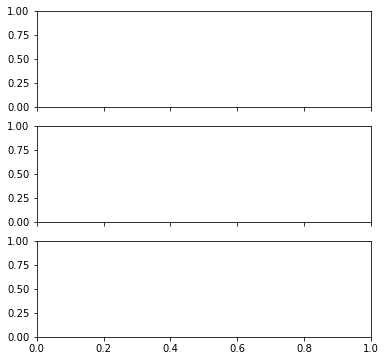

In [3]:
#### temp investigating

regiondf = {'mesc':regionAllmESC['length'],
            'ind':regionAllInd['length'],
            'dep':regionAllDep['length']}
            
divs = {'mesc': [50, 200, 370, 500, 630, 800, 970, 1090, 1200],
        'ind': [70, 205, 340, 475, 610, 780, 950, 1120, 1300, 1500, 1650, 1770, 1980, 2170, 2350, 2520, 2660],
        'dep': [70, 205, 345, 470, 605, 740, 880, 1005, 1175, 1320, 1500, 1740, 1890, 2035, 2180, 2310, 2480, 2740, 2870, 3000]}
            
refL = {'mesc': 3080,
        'ind': 2706,
        'dep': 3087}

names = {'mesc': 'mESC',
         'ind': 'S1',
         'dep': 'S2'}
    
molecule = 'mesc'


hist, bine = np.histogram(regiondf[molecule], bins=np.arange(-0.5, refL[molecule] + 0.5))
binc = bine[0:-1] + 0.5

hist = hist.astype('float')
ix = 0
while hist[ix] == 0:
    hist[ix] = np.nan
    ix += 1


Text(0, 0.5, 'counts')

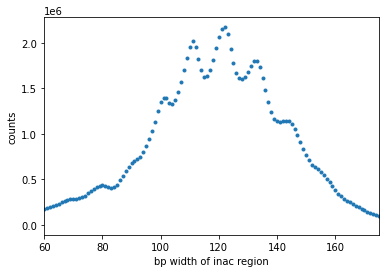

In [9]:
plt.plot(binc, hist, '.')
plt.xlim([60,175])
plt.xlabel('bp width of inac region')
plt.ylabel('counts')

Text(0.5, 1.0, 'Trinucleotide region widths')

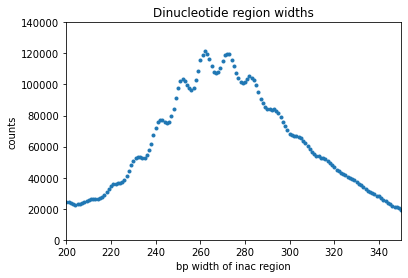

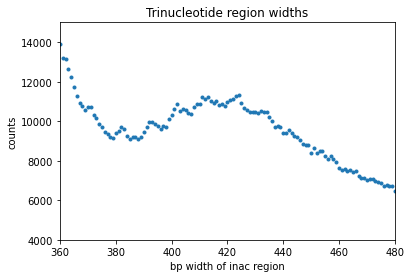

In [22]:
plt.plot(binc, hist, '.')
plt.xlim([200,350])
plt.ylim([0,140000])
plt.xlabel('bp width of inac region')
plt.ylabel('counts')
plt.title('Dinucleotide region widths')

plt.figure()
plt.plot(binc, hist, '.')
plt.xlim([360,480])
plt.ylim([4000,15000])
plt.xlabel('bp width of inac region')
plt.ylabel('counts')
plt.title('Trinucleotide region widths')